In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [3]:
df.shape

(150, 6)

In [4]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols_to_scale = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
normalized_data = scaler.fit_transform(df[numerical_cols_to_scale])
normalized_df = pd.DataFrame(normalized_data, columns=numerical_cols_to_scale)
display(normalized_df.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [7]:
numerical_cols_to_scale = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_dropped = df.drop(columns=numerical_cols_to_scale)
df = pd.concat([df_dropped, normalized_df], axis=1)
display(df.head())

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,Iris-setosa,0.222222,0.625000,0.067797,0.041667
1,2,Iris-setosa,0.166667,0.416667,0.067797,0.041667
2,3,Iris-setosa,0.111111,0.500000,0.050847,0.041667
3,4,Iris-setosa,0.083333,0.458333,0.084746,0.041667
4,5,Iris-setosa,0.194444,0.666667,0.067797,0.041667


In [8]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


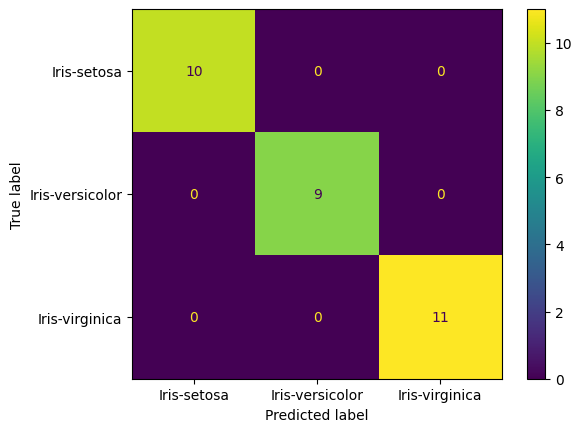

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [12]:
k_values = range(1, 21)
print(k_values)

range(1, 21)


In [13]:
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print(accuracy_scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [14]:
results_df = pd.DataFrame({'K Value': list(k_values), 'Accuracy': accuracy_scores})
display(results_df)

,K Value,Accuracy
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,1.0


In [15]:
best_k_row = results_df.loc[results_df['Accuracy'].idxmax()]
best_k = int(best_k_row['K Value'])
print(f"The best K value is: {best_k}")

The best K value is: 1


## Summary:

### Data Analysis Key Findings

*   The KNeighborsClassifier model was trained and evaluated for K values ranging from 1 to 20.
*   For all tested K values (from 1 to 20), the model achieved an accuracy of 1.0 on the testing data.
*   Based on the recorded results, the best K value that yields the highest performance (accuracy) is 1.

### Insights or Next Steps

*   The consistent accuracy of 1.0 across all tested K values suggests that the dataset is likely linearly separable, making the choice of K less critical within this range.
*   To further understand the model's performance and potentially identify a more robust K value, consider evaluating other metrics like precision, recall, or F1-score, especially if the dataset is imbalanced.
